In [1]:
from dustmaps.sfd import SFDQuery
from astropy.coordinates import SkyCoord
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import os
import time
import sklearn.metrics as skmet
import torch
import asdf
import pickle
import scipy.integrate as sintg
import gc

import tools
import importlib
importlib.reload(tools)

<module 'tools' from '/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/angular_cross_correlation/tools.py'>

In [2]:
device="cpu"

In [3]:
dats={}
dats["MAIN"]=tools.load_NGC(fp="./exgal_catalogs/object_sdss_spectro.fits",ra="PLUG_RA",dec="PLUG_DEC",cuts={"OBJTYPE":lambda x:x=="GALAXY"})
dats["LOWZ"]=tools.load_NGC(fp="./exgal_catalogs/galaxy_DR12v5_LOWZ_North.fits.gz")
dats["CMASS"]=tools.load_NGC(fp="./exgal_catalogs/galaxy_DR12v5_CMASS_North.fits.gz")
dats["QSO"]=tools.load_NGC(fp="./exgal_catalogs/eBOSS_QSO_full_ALLdata-vDR16.fits")

In [4]:
plt.rcParams.update({'font.family':'serif', 'font.size': 16})

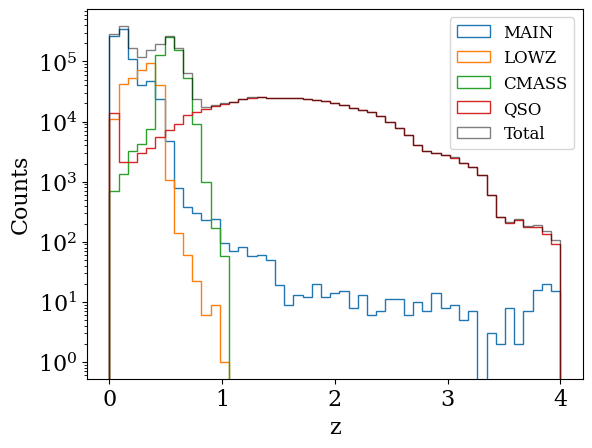

In [6]:
bins=np.linspace(0,4,50)
plt.figure()
allrefz = []
for name,dat in dats.items():
    vals, _, _ = plt.hist(dat[:,2],bins=bins,histtype="step",label=name)
    allrefz.append(dat[:, 2])
allrefz = np.hstack(allrefz)
_ = plt.hist(allrefz, bins=bins, histtype="step", label='Total', color='k', linewidth=1, alpha=0.5)
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("Counts")
plt.legend(prop={'size': 12})
plt.savefig('../plots/exgal_hist.pdf', bbox_inches='tight')
plt.show()